In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
# Data taken from https://github.com/cvxgrp/cvxbook_additional_exercises/blob/main/python/path_plan_contingencies_data.py
N = 120
O = 60
S = 30
h = 0.5
p1 = p2 = pN_1 = pN = 0.3

In [6]:
p = cp.Variable((3, N))

constrs = [constr for constr_tuple in
           [(p[0, i] == p[1, i], p[2, i] == p[1, i]) for i in range(2, S+1)]
           for constr in constr_tuple]
constrs += [p[0, O] >= h,
            p[1, O] <= -h]
constrs += [p[:, 0] == p1*np.ones(3),
            p[:, 1] == p2*np.ones(3),
            p[:, N-2] == pN_1*np.ones(3),
            p[:, N-1] == pN*np.ones(3)]

f0 = cp.sum( [ cp.sum_squares( cp.vstack([p[k, i-1] - 2*p[k, i] + p[k, i+1] for i in range(2, N-2)]) ) for k in range(3)] )

prob = cp.Problem(cp.Minimize(f0), constrs)
prob.solve()

0.000142347148080024

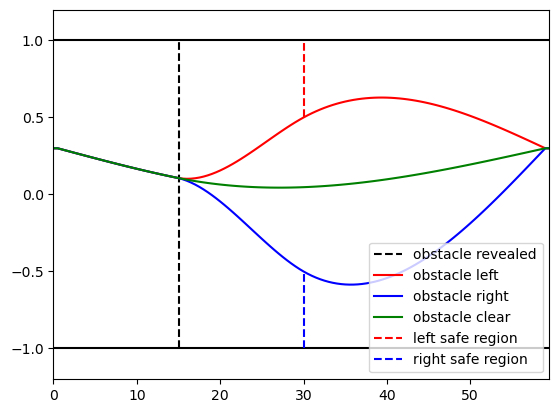

In [12]:
fig, ax = plt.subplots()
x = np.arange(0, N, 1) * h
plt.plot((S * h, S * h), (-1, 1), 'k--', label='obstacle revealed')
ax.set_xlim((x[0], x[N-1])); ax.set_ylim((-1.2, 1.2))
ax.plot(x, (p.value)[0, :], color='red', label='obstacle left')
ax.plot(x, (p.value)[1, :], color='blue', label='obstacle right')
ax.plot(x, (p.value)[2, :], color='green', label='obstacle clear')
ax.plot(x, [1]*N, color='black')
ax.plot(x, [-1]*N, color='black')
plt.plot((O * h, O * h), (0.5, 1), 'r--', label='left safe region')
plt.plot((O * h, O * h), (-1, -0.5), 'b--', label='right safe region')
plt.legend(loc = 4)
plt.savefig('path_plan_cont.pdf', bbox_inches='tight')
plt.show();